 This notbook is focused on exploring the Scikit-Learn libary with a beginner friendly approach. I will also try to explain the models used in this notebook and thier inner workings. This is my frist notebook and also my first competition, so any feedback would be highly appreciated.  

In [1]:
#Let's start by importing the packages we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay
import numpy as np
# setting a seed so we can compare how our models perform
np.random.seed(1)


First, we are going to handle our data. This essentially means pre-processing our data so that the inputs to our models are "stabilized" increasing their robustness, this is called feature engineering. This includes dealing with missing values in our data.

In [2]:
# Read the .csv file
df = pd.read_csv("../input/titanic/train.csv")

# now let's do some feature engineering
# we will combine both the siblings column and parnets coulmn into one
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
# we will fill the NAN cells of the age column with the mean of all the ages
df['Age'] = df.Age.fillna(np.mean(df['Age']))
# we will fill the Nan cells of the cabin column with the string 'Unknown',and map cabin numbers into deck letters so we can encode them later
df['Cabin'] = df.Cabin.fillna('unknown')
df['Cabin'] = [word[0] if word != 'unknown' else 'unknown' for word in df['Cabin']]
# now lets drop the cols with irrelevant/unused data
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1)

# Encode the the 'labels' or the y, we will also encode the Categorical columns to feed it better into our models.
encoder = LabelEncoder()
scaler = StandardScaler()
df['Survived'] = encoder.fit_transform(df['Survived'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df['Cabin'] = encoder.fit_transform(df['Cabin'])
# Define our X and Y and scale our X for a normalization effect, and split our data into train/test.
x = df.drop('Survived', axis=1)
x = scaler.fit_transform(x)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22)


# Random Forest Classifier 

We will start with the random forest model. Random forest is an ensemble of decision trees. creating an ensemble of decision trees and averaging their output produces a better performence than just one decision tree. It also helps with fighting overfitting. 

In [3]:
# first we create an instance of the model
rfc = RandomForestClassifier(n_estimators=100)
#then we simply fit the model by calling the method fit()
rfc.fit(x_train, y_train)


RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       114
           1       0.81      0.65      0.72        83

    accuracy                           0.79       197
   macro avg       0.79      0.77      0.77       197
weighted avg       0.79      0.79      0.78       197

[[101  13]
 [ 29  54]]


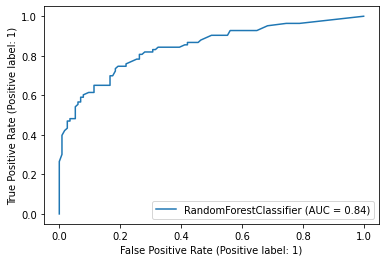

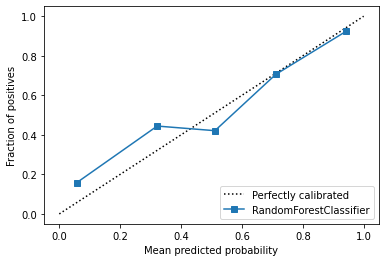

In [4]:
#Let's see how well the Random Forest Classifier perform
pred_rfc = rfc.predict(x_test)
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

#and some visualization
rfc_roc_curve = RocCurveDisplay.from_estimator(rfc, x_test, y_test)
rfc_cal = CalibrationDisplay.from_estimator(rfc, x_test, y_test)

# SVC - Support Vector Machine

Support vector machines offer a simple yet elegant solution to regression and classification problems. SVMs take features vector on draw them on a n-dimensional plot (where n is the number of features), then they try through training to draw a line or kernal to the best of their abilites to seprate the classes into their categories. Kernals help deal with non-linear data by introducing a plane instead of a line to seprate the data, and by geometrically manipulating the plot to fit the kernals to seprate the classes. 

In [5]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       114
           1       0.86      0.60      0.71        83

    accuracy                           0.79       197
   macro avg       0.81      0.77      0.77       197
weighted avg       0.80      0.79      0.78       197

[[106   8]
 [ 33  50]]


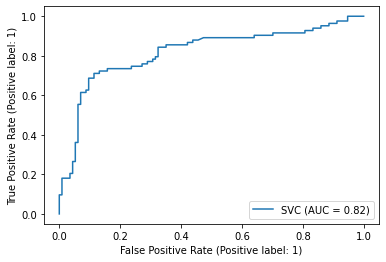

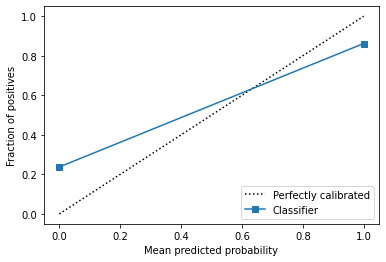

In [6]:
# SVC performence
pred_svc = svc.predict(x_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

#some visualization
svc_roc_curve = RocCurveDisplay.from_estimator(svc, x_test, y_test)
svc_cal = CalibrationDisplay.from_predictions(y_test, pred_svc)

# Gradient Tree Boosting Classifier

Similar to the Random Tree Forest, GTB classifiers are an ensemble of many weak decision tree classifiers. The main difference is that GTBs use the gradients of the current classifier to 'boost' the next classifier in line, instead of averaging the outputs of all classifiers as in Random Forest classifiers.

In [7]:
# Graidnt boosting model
gbc = GradientBoostingClassifier()
gbc = gbc.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       114
           1       0.88      0.63      0.73        83

    accuracy                           0.81       197
   macro avg       0.83      0.78      0.79       197
weighted avg       0.82      0.81      0.80       197

[[107   7]
 [ 31  52]]


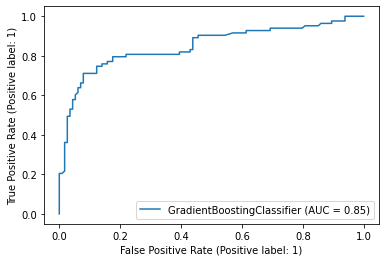

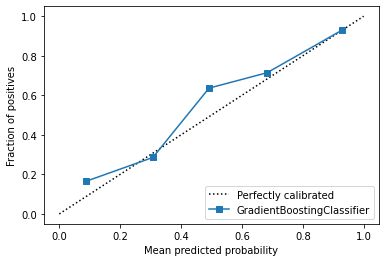

In [8]:

#Let's see how does the GBC perform
pred_gbc = gbc.predict(x_test)

print(classification_report(y_test, pred_gbc))
print(confusion_matrix(y_test, pred_gbc))

#Visualization
gbc_roc_curve = RocCurveDisplay.from_estimator(gbc, x_test, y_test)
gbc_cal = CalibrationDisplay.from_estimator(gbc, x_test, y_test)

# Neural Netwroks

NNs are becoming increasingly popular as our computing capacities increase throughout the years, mainly because of their flexibility, but also because they can handle large amounts of data very well. They basically work in two phases, forward propagation and backward propagation. In forward propagation,  you fit your data with a linear function, followed by a nonlinear activation function. In backward propagation you calculate the derivtaives to update the NN's parameters using gradient descent, similar to logistic regression. However, their strength lies in the fact that they layer on this fitting ' process into multiple layers of fully connected neurons. However, this is also might be their weakness, as NNs require a large amount of data to train and perform well.  Due to their flexibility, they can also be used for computer vision with convolutional neural networks or sequential data with RNNs and transformers. For this notebook, we will work with a simple architecture and we won't get into detail into optimizing NNs, but feel free to experiment with NNs and explore their potential.

In [9]:
# now let's try a small NN with three layers
mlpc = MLPClassifier(hidden_layer_sizes= (8, 5, 3), solver='sgd', batch_size= 64, learning_rate= 'adaptive', max_iter= 600)
mlpc.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(batch_size=64, hidden_layer_sizes=(8, 5, 3),
              learning_rate='adaptive', max_iter=600, solver='sgd')

While our model hasn't fully converged yet, iterating more will expose us to the risk of overfitting with the size of our  dataset

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       114
           1       0.82      0.64      0.72        83

    accuracy                           0.79       197
   macro avg       0.79      0.77      0.77       197
weighted avg       0.79      0.79      0.78       197

[[102  12]
 [ 30  53]]


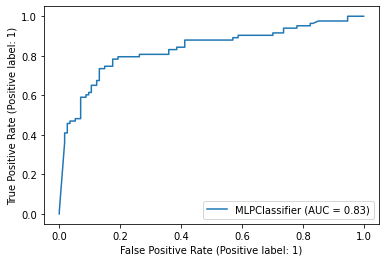

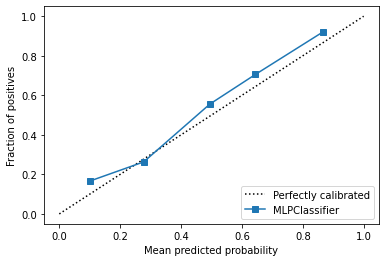

In [10]:
# Let's see how does the NN perform
pred_mlpc = mlpc.predict(x_test)

print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

#Visualization
mlpc_roc_curve = RocCurveDisplay.from_estimator(mlpc, x_test, y_test)
mlpc_cal = CalibrationDisplay.from_estimator(mlpc, x_test, y_test)

# Creating an Ensemble

An ensemble is a model that combines multiple classifiers and averages their results with different mechinism. the Scikit liabray provides many ensemble functions. We will use the voting classifier, which takes the models you created and, based on the argument, performs either a 'hard' vote, where it returns the outcome of the majority of the classifiers, or a 'soft' vote, where it takes the argmax of the sum of all classifiers outputs. While creating an ensemble can increase the performance of the model's predictions, we mainly use  ensemble models  to make our models more robust to overfitting.

In [11]:
# Finally, let's compile an ensemble model using our previous models. We will also weight our models based on their performance
elcf = VotingClassifier(
    estimators= [('rfc', rfc), ('svc', svc), ('gbc', gbc), ('mlpc', mlpc)], voting = 'soft', weights= [2, 1, 2, 2])
elcf.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


VotingClassifier(estimators=[('rfc', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('gbc', GradientBoostingClassifier()),
                             ('mlpc',
                              MLPClassifier(batch_size=64,
                                            hidden_layer_sizes=(8, 5, 3),
                                            learning_rate='adaptive',
                                            max_iter=600, solver='sgd'))],
                 voting='soft', weights=[2, 1, 2, 2])

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       114
           1       0.85      0.61      0.71        83

    accuracy                           0.79       197
   macro avg       0.81      0.77      0.77       197
weighted avg       0.80      0.79      0.78       197

[[105   9]
 [ 32  51]]


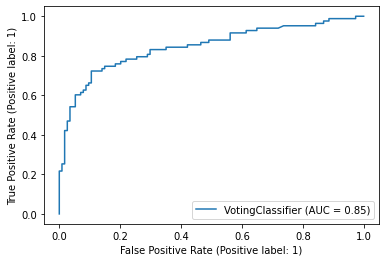

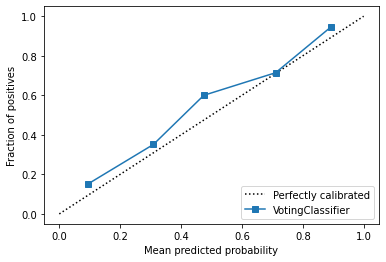

In [12]:
#Let's how the ensemble performs
pred_elcf = elcf.predict(x_test)

print(classification_report(y_test, pred_elcf))
print(confusion_matrix(y_test, pred_elcf))

elcf_roc_curve = RocCurveDisplay.from_estimator(elcf, x_test, y_test)
elcf_cal = CalibrationDisplay.from_estimator(elcf, x_test, y_test)

# Writing to the CSV file

Finnaly we will use our ensamble model to predict the test csv file, and write it to a submission csv file 

In [13]:
# first lets pre-process our data so it is identical to the inputs of the trained models 
df_test = pd.read_csv("../input/titanic/test.csv")

df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

df_test['Age'] = df_test.Age.fillna(np.mean(df_test['Age']))

df_test['Cabin'] = df_test.Cabin.fillna('unknown')
df_test['Cabin'] = [word[0] if word != 'unknown' else 'unknown' for word in df_test['Cabin']]

df_test['Fare'] = df_test.Fare.fillna('7')
df_test = df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1)


df_test['Sex'] = encoder.fit_transform(df_test['Sex'])
df_test['Embarked'] = encoder.fit_transform(df_test['Embarked'])
df_test['Cabin'] = encoder.fit_transform(df_test['Cabin'])
x_stest = scaler.fit_transform(df_test)


In [14]:
#Now let's create the submission csv file
submission_df = pd.DataFrame(columns = ['PassengerId', 'Survived'])
pid = [i for i in range(892, 1310)]
submission_df['PassengerId'] = pid

#make the predictions
pred_test = elcf.predict(x_stest)
submission_df['Survived'] = pred_test
submission_df.to_csv('submission.csv', index = False)

In closing, I would first like to thank you for going through my notebook. As I mentioned earlier, I would appreciate any feedback.